<h1> Important imports </h1>

In [ ]:
! pip install tf_explain
! pip install keras_preprocessing




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [02:07<00:00, 38.7MB/s]
100% 4.00G/4.00G [02:07<00:00, 33.6MB/s]


In [ ]:
! unzip state-farm-distracted-driver-detection

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #opencv library
import glob
import matplotlib.pyplot as plt  #plotting library
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from skimage import io
from keras.callbacks import EarlyStopping
from PIL import Image
from tqdm import tqdm
import h5py
import seaborn as sns
import os
import random as rnd
import secrets
import plotly.express as px
from tf_explain.core.activations import ExtractActivations
from tf_explain.core.grad_cam import GradCAM
from tensorflow.keras.layers import Input, Conv2D,GlobalAveragePooling2D , MaxPooling2D, AveragePooling2D, Concatenate, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from keras import layers
from keras import models
from keras import optimizers
from keras.models import Sequential, Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, load_img
from keras.layers import Convolution2D,Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
print(os.listdir("/content/imgs"))

['train', 'test']


<h1> Setting directory paths </h1>

In [ ]:
df_train_full = pd.read_csv('/content/driver_imgs_list.csv')
df_train_full['path']= '/content/imgs/train/' + df_train_full['classname']+ '/' +df_train_full['img']
df_test = '/content/imgs/'
train_dir='/content/imgs/train/'

In [ ]:
classes = {   'c0' : "safe_driving",
                      'c1' : "texting-right",
                      'c2' : "talking_on_the_phone-right",
                      'c3' : "texting-left",
                      'c4' : "talking_on_the_phone-left",
                      'c5' : "operating_the_radio",
                      'c6' : "drinking",
                      'c7' : "reaching_behind",
                      'c8' : "hair-and-makeup",
                      'c9' : "talking_to_passenger"}
classes

{'c0': 'safe_driving',
 'c1': 'texting-right',
 'c2': 'talking_on_the_phone-right',
 'c3': 'texting-left',
 'c4': 'talking_on_the_phone-left',
 'c5': 'operating_the_radio',
 'c6': 'drinking',
 'c7': 'reaching_behind',
 'c8': 'hair-and-makeup',
 'c9': 'talking_to_passenger'}

In [ ]:
df_train_full.head()

,subject,classname,img,path
0,p002,c0,img_44733.jpg,/content/imgs/train/c0/img_44733.jpg
1,p002,c0,img_72999.jpg,/content/imgs/train/c0/img_72999.jpg
2,p002,c0,img_25094.jpg,/content/imgs/train/c0/img_25094.jpg
3,p002,c0,img_69092.jpg,/content/imgs/train/c0/img_69092.jpg
4,p002,c0,img_92629.jpg,/content/imgs/train/c0/img_92629.jpg


In [ ]:
num_samples_to_use = int(0.25 * len(df_train_full))
subset_indices = random.sample(range(len(df_train_full)), num_samples_to_use)
df_train = df_train_full.iloc[subset_indices]

# Print the number of samples in the 25% subset
print("Number of samples in 25% subset:", len(df_train))

Number of samples in 25% subset: 5606


In [ ]:
print("Number of image files for in training dataset: ",len(df_train))
print("Number of classes: ",len(df_train['classname'].value_counts()))

Number of image files for in training dataset:  5606
Number of classes:  10


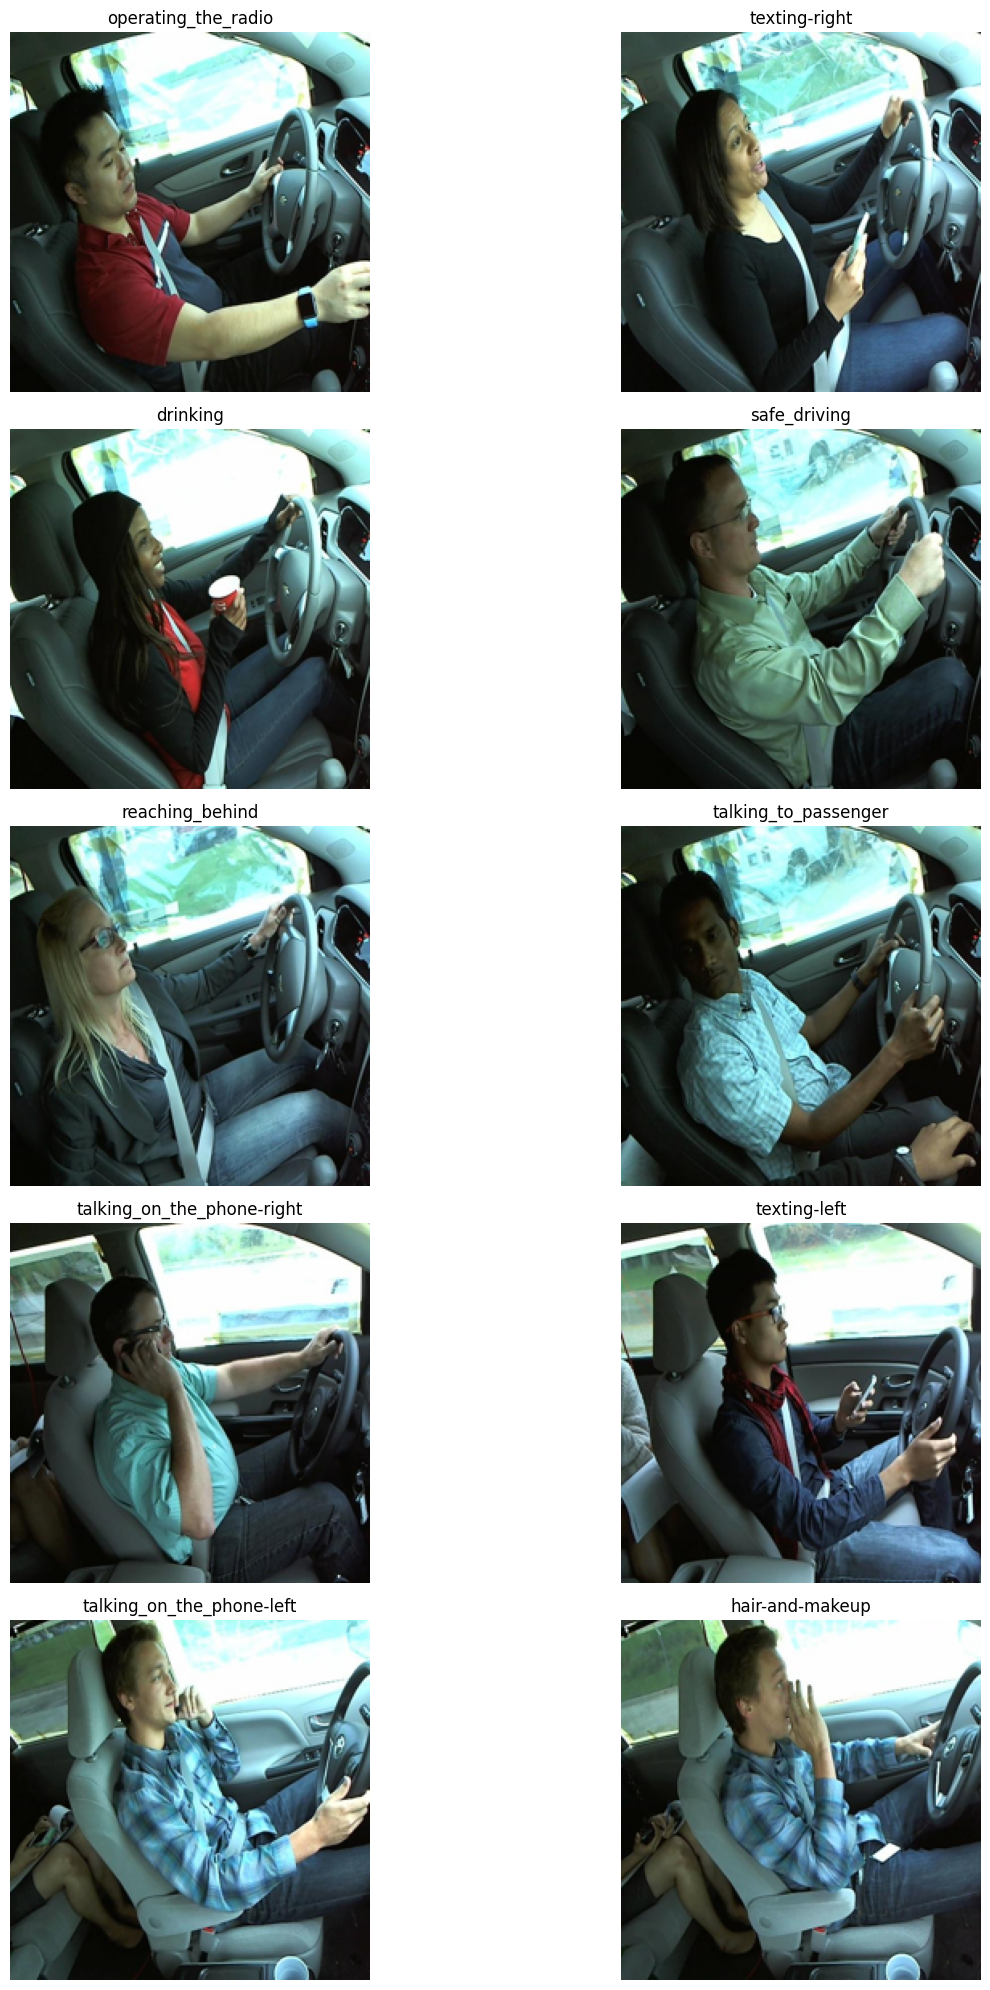

In [ ]:
plt.figure(figsize = (15,20))
for idx,i in enumerate(df_train.classname.unique()):
    plt.subplot(5,2,idx+1)
    df = df_train[df_train['classname'] ==i].reset_index(drop = True)
    image_path = df.loc[rnd.randint(0, len(df))-1,'path']
    img = Image.open(image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(classes[i])
plt.tight_layout()
plt.show()

In [ ]:
# Create the count plot
fig = px.histogram(df_train, x='classname', color_discrete_sequence=['blue'])  # Change the color here

# Set the layout
fig.update_layout(
    title='Driver Class Distribution',
    title_font=dict(family='Arial', size=24),  # Change the font family and size for the title
    xaxis_title='Driver classes',
    xaxis=dict(title_font=dict(family='Arial', size=18)),  # Change the font family and size for x-axis label
    yaxis_title='Count',
    yaxis=dict(title_font=dict(family='Arial', size=14)),  # Change the font family and size for y-axis label
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=100, b=50),
)



# Show the plot
fig.show()

In [ ]:
widths, heights = [], []

for path in tqdm(df_train["path"]):
    width, height = Image.open(path).size
    widths.append(width)
    heights.append(height)

df_train["width"] = widths
df_train["height"] = heights
df_train["dimension"] = df_train["width"] * df_train["height"]

100%|██████████| 5606/5606 [00:00<00:00, 7145.47it/s]
<ipython-input-15-45a28a193c6a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-45a28a193c6a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-45a28a193c6a>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
df_train

,subject,classname,img,path,width,height,dimension
446,p002,c5,img_40621.jpg,/content/imgs/train/c5/img_40621.jpg,640,480,307200
5860,p022,c1,img_86488.jpg,/content/imgs/train/c1/img_86488.jpg,640,480,307200
21222,p075,c5,img_88434.jpg,/content/imgs/train/c5/img_88434.jpg,640,480,307200
6438,p022,c6,img_96573.jpg,/content/imgs/train/c6/img_96573.jpg,640,480,307200
4432,p021,c0,img_101286.jpg,/content/imgs/train/c0/img_101286.jpg,640,480,307200
...,...,...,...,...,...,...,...
7192,p024,c2,img_37894.jpg,/content/imgs/train/c2/img_37894.jpg,640,480,307200
7917,p024,c8,img_34889.jpg,/content/imgs/train/c8/img_34889.jpg,640,480,307200
15621,p051,c2,img_92165.jpg,/content/imgs/train/c2/img_92165.jpg,640,480,307200
13505,p047,c9,img_38811.jpg,/content/imgs/train/c9/img_38811.jpg,640,480,307200


<h1> Create training / test data </h1>

**Augmentation**


In [ ]:
def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def change_contrast(img, level):
    img = Image.fromarray(img.astype('uint8'))
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return np.array(img.point(contrast))

def preprocessing(img):
    img_arr = np.array(img)

    x = random.randint(0, 1)

    if x == 0:
        img_arr = increase_brightness(img_arr, secrets.randbelow(26))
        img_arr = change_contrast(img_arr, secrets.randbelow(51))
    else:
        img_arr = change_contrast(img_arr, secrets.randbelow(51))
        img_arr = increase_brightness(img_arr, secrets.randbelow(26))

    return img_arr


datagen = ImageDataGenerator(
        rotation_range = 5,
        width_shift_range = 0.03,
        height_shift_range = 0.03,
        shear_range = 0.03,
        zoom_range = 0.03,
        horizontal_flip = False,
        fill_mode = "nearest",
        validation_split = 0.2,
        preprocessing_function = preprocessing)

In [ ]:
X, y = df_train[['path', 'classname']], df_train['classname']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
trainGenerator_cnn = datagen.flow_from_dataframe(X_train,
                                         x_col='path',
                                         y_col='classname',
                                        target_size=(240,240),
                                        batch_size=32,
                                        subset='training',shuffle=True)

validationGenerator_cnn = datagen.flow_from_dataframe(X_test,
                                          x_col='path',
                                         y_col='classname',
                                        target_size=(240,240),
                                        batch_size=32,
                                        subset='validation',shuffle=False)

Found 3140 validated image filenames belonging to 10 classes.
Found 336 validated image filenames belonging to 10 classes.


In [ ]:
model = models.Sequential()

    # Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240,240,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output from convolutional layers to pass to dense layers
model.add(layers.Flatten())

    # Fully connected (Dense) layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
for batch_images, batch_labels in trainGenerator_cnn:
    # 'batch_images' is a batch of input images
    # 'batch_labels' is a batch of corresponding labels

    # Print batch shape and label values
    print("Batch images shape:", batch_images.shape)
    print("Batch labels:", batch_labels)

    # Break the loop if you want to print only the first batch
    break

Batch images shape: (32, 240, 240, 3)
Batch labels: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
#history_cnn_model = model.fit(
      #trainGenerator_cnn,
     #validation_data=validationGenerator_cnn,
      #epochs=50,
      #verbose=1)

In [ ]:
#plt.figure(figsize=(15,5))
#plt.plot(history_cnn_model.history['loss'])
#plt.plot(history_cnn_model.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('loss')
#plt.xlabel('Epoch')
#plt.show()

In [ ]:
#plt.figure(figsize=(15,5))
#plt.plot(history_cnn_model.history['accuracy'])
#plt.plot(history_cnn_model.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.show()

In [ ]:
dict_class = {'c0':0, 'c1':1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5':5, 'c6': 6, 'c7':7, 'c8':8, 'c9':9}

In [ ]:
def gradcam_visualise(data, model, class_index):
    explainer = GradCAM()
    output = explainer.explain(data, model, class_index=class_index)
    return output

def activation_visualise(image, model, layers):
    explainer = ExtractActivations()
    output = explainer.explain([image], model, layers_name=layers)
    return output

In [ ]:
def plot_data_four(class_name, outputs):
    fig = plt.figure(figsize=(16, 16))
    plt.suptitle(classes[class_name])
    plt.subplot(2,2,1)
    plt.imshow(outputs[0])
    plt.subplot(2,2,2)
    plt.imshow(outputs[1])
    plt.subplot(2,2,3)
    plt.imshow(outputs[2])
    plt.subplot(2,2,4)
    plt.imshow(outputs[3])
    plt.show()

In [ ]:
def grad_cam(model, df_exp, class_name, class_index, image_size):
    output_data = []
    classes_df = df_exp[df_exp['classname'] ==  class_name].reset_index(drop = True)
    for idx,i in enumerate(np.random.choice(classes_df['path'],4)):
        image = cv2.imread(i)
        image = cv2.resize(image, image_size)
        data = ([image], None)
        output = gradcam_visualise(data, model, class_index)
        output_data.append(output)
    plot_data_four(class_name, output_data)

In [ ]:
def activations_model(model, df_exp, class_name, layers, image_size):
    output_data = []
    classes_df = df_exp[df_exp['classname'] ==  class_name].reset_index(drop = True)
    for idx,i in enumerate(np.random.choice(classes_df['path'],4)):
        image = cv2.imread(i)
        image = cv2.resize(image, image_size)
        image = tf.expand_dims(image, axis=0)
        output = activation_visualise([image], model, layers)
        output_data.append(output)
    plot_data_four(class_name, output_data)

In [ ]:
#for class_name in X_test['classname'].unique():
   # grad_cam(model, X_test, class_name, dict_class[class_name], (240,240))

In [ ]:
#test_loss, test_accuracy = model.evaluate(validationGenerator_cnn, verbose=1)

# Print the test accuracy
#print("Test Accuracy:", test_accuracy)

In [ ]:
y_count=len(df_train['classname'].unique())
y_count

10

In [ ]:
resNet50 = ResNet50(include_top = False, input_shape = (240,240,3), weights = 'imagenet')

for layer in resNet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resNet50.output)
predictions = Dense(y_count, activation='softmax')(x)

model_resNet50 = Model(inputs = resNet50.input, outputs = predictions)


In [ ]:
model_resNet50.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
rlrp_resNet50 = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.01,patience=2,verbose=2,mode="auto",min_delta=0.0001,cooldown=0,min_lr=0)
model_resNet50.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 246, 246, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 120, 120, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
train_generator_resnet50 = datagen.flow_from_dataframe(
        X_train,  # This is the source directory for training images
        x_col='path',
        y_col='classname',
        target_size=(240, 240),  # All images will be resized to 150x150
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
        preprocessing_function=preprocess_input
)

val_generator_resnet50 = datagen.flow_from_dataframe(
        X_test,  # This is the source directory for training images
        x_col='path',
        y_col='classname',
        target_size=(240, 240),  # All images will be resized to 150x150
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
        preprocessing_function=preprocess_input
)

Found 3924 validated image filenames belonging to 10 classes.
Found 1682 validated image filenames belonging to 10 classes.


In [ ]:
history_resNet50 = model_resNet50.fit(
      train_generator_resnet50,
     validation_data=val_generator_resnet50,
      epochs=20,
       callbacks = [rlrp_resNet50],
      verbose=2)

Epoch 1/20
123/123 - 104s - loss: 1.8427 - accuracy: 0.3779 - val_loss: 1.3256 - val_accuracy: 0.5571 - lr: 0.0010 - 104s/epoch - 848ms/step
Epoch 2/20
123/123 - 100s - loss: 1.1186 - accuracy: 0.6549 - val_loss: 0.9994 - val_accuracy: 0.7021 - lr: 0.0010 - 100s/epoch - 812ms/step
Epoch 3/20
123/123 - 98s - loss: 0.8658 - accuracy: 0.7500 - val_loss: 0.7862 - val_accuracy: 0.7717 - lr: 0.0010 - 98s/epoch - 796ms/step
Epoch 4/20
123/123 - 101s - loss: 0.7093 - accuracy: 0.8028 - val_loss: 0.6954 - val_accuracy: 0.8044 - lr: 0.0010 - 101s/epoch - 820ms/step
Epoch 5/20
123/123 - 97s - loss: 0.6022 - accuracy: 0.8384 - val_loss: 0.6163 - val_accuracy: 0.8294 - lr: 0.0010 - 97s/epoch - 792ms/step
Epoch 6/20
123/123 - 101s - loss: 0.5551 - accuracy: 0.8458 - val_loss: 0.5726 - val_accuracy: 0.8347 - lr: 0.0010 - 101s/epoch - 823ms/step
Epoch 7/20
123/123 - 100s - loss: 0.4706 - accuracy: 0.8812 - val_loss: 0.5233 - val_accuracy: 0.8472 - lr: 0.0010 - 100s/epoch - 814ms/step
Epoch 8/20
123/12

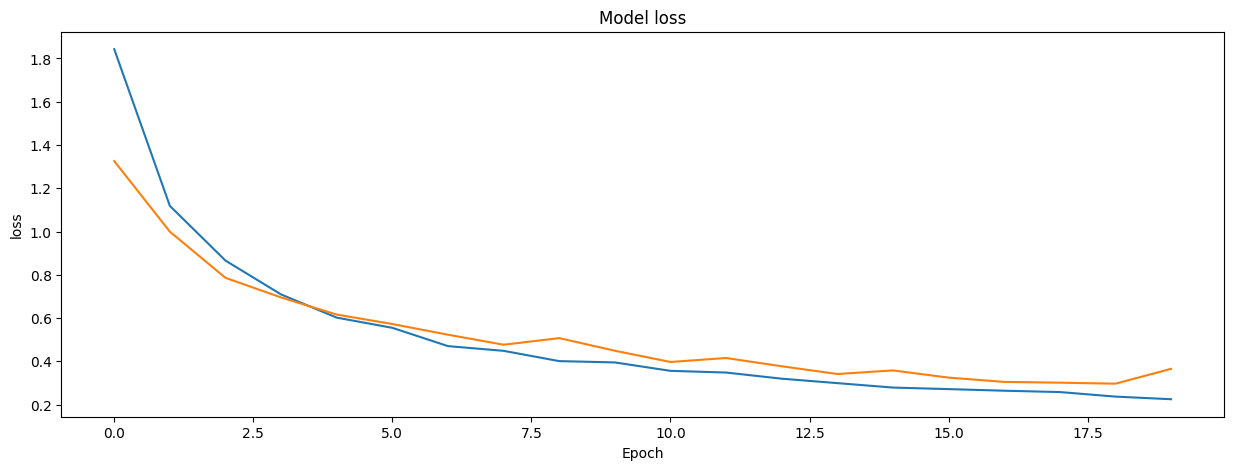

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history_resNet50.history['loss'])
plt.plot(history_resNet50.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

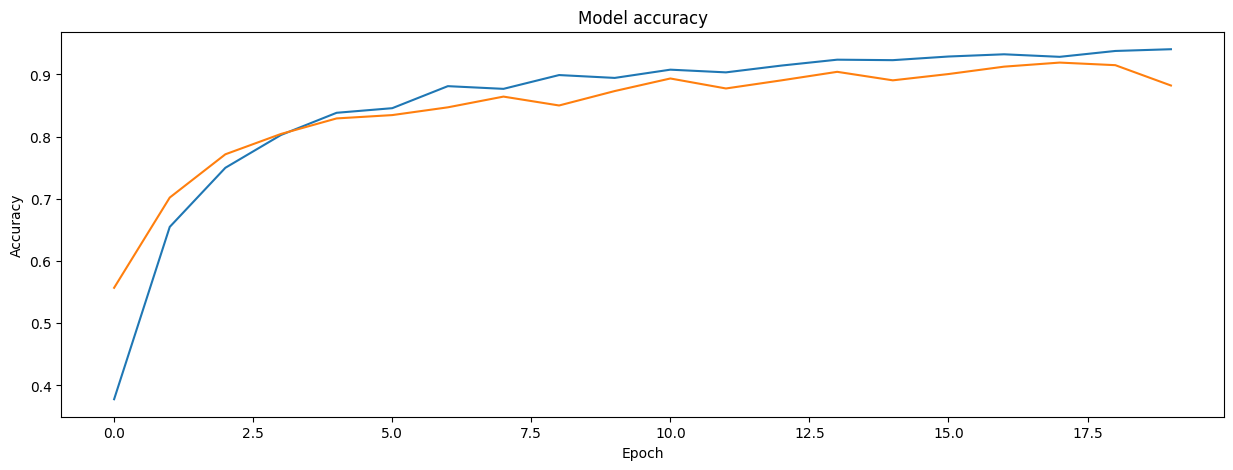

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history_resNet50.history['accuracy'])
plt.plot(history_resNet50.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_gen = ImageDataGenerator()
test_data = test_gen.flow_from_directory(df_test ,
                                        target_size=(240,240),
                                        batch_size=32,
                                        classes = ['test'],
                                        shuffle = False)

Found 79726 images belonging to 1 classes.


In [ ]:
preds = model_resNet50.predict(test_data)
preds

2492/2492 [==============================] - 323s 129ms/step


array([[5.77026920e-04, 2.58090848e-04, 3.54334200e-03, ...,
        2.79002852e-04, 3.42600433e-05, 2.47980875e-04],
       [2.25117490e-01, 5.20599866e-03, 1.72918581e-03, ...,
        1.14959674e-02, 3.44543159e-02, 5.37327630e-03],
       [5.23974448e-02, 5.73351502e-01, 4.55354777e-04, ...,
        6.31227270e-02, 2.58544981e-01, 3.29204723e-02],
       ...,
       [1.00190075e-04, 2.68819481e-02, 6.31975536e-06, ...,
        6.59454672e-04, 7.51908030e-03, 5.16757602e-04],
       [1.36080061e-07, 5.99928433e-04, 1.89995207e-02, ...,
        2.63224146e-03, 2.48033881e-01, 8.33243757e-06],
       [4.95744161e-02, 1.29020878e-03, 3.52462125e-03, ...,
        4.63430077e-01, 4.25300375e-02, 3.00702453e-03]], dtype=float32)

In [ ]:
test_imgs = os.path.join(df_test , 'test')
test_ids = sorted(os.listdir(test_imgs))
pred_df = pd.DataFrame(columns=['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])
for i in range(len(preds)):
    pred_df.loc[i,'img'] = test_ids[i]
    pred_df.loc[i , 'c0':'c9'] = preds[i]
pred_df

KeyboardInterrupt: ignored

In [ ]:
copy_df=pred_df

# Convert confidence score columns to numeric data type
confidence_cols = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
copy_df[confidence_cols] = copy_df[confidence_cols].apply(pd.to_numeric)

# Randomly select 10 indices
random_indices = random.sample(range(len(copy_df)), 10)

# Load and display randomly selected images with predicted class labels
for index in random_indices:
    row = copy_df.iloc[index]
    img_path = row['img']
    predicted_class = classes[confidence_cols[row[confidence_cols].values.argmax()]]

    img = Image.open(df_test+'test/'+img_path)

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

In [ ]:
for class_name in X_test['classname'].unique():
    grad_cam(model_resNet50, X_test, class_name, dict_class[class_name], (560,560))

In [ ]:
pred_df.to_csv('submission.csv',index = False)

In [ ]:
preds_val = model_resNet50.predict(val_generator_resnet50)
preds_val

53/53 [==============================] - 32s 572ms/step


array([[1.52739418e-07, 9.99995112e-01, 2.56859245e-08, ...,
        5.99637406e-09, 1.17938988e-07, 2.20343026e-07],
       [1.91644212e-09, 3.35521548e-08, 1.72356647e-06, ...,
        6.76623313e-10, 3.12620341e-06, 9.01682728e-09],
       [7.80304845e-07, 9.99926925e-01, 5.15836632e-07, ...,
        2.08406306e-07, 1.66659788e-06, 4.94937558e-06],
       ...,
       [8.24724609e-08, 3.33551475e-06, 4.32417266e-08, ...,
        3.08459791e-09, 1.03387379e-08, 2.74835344e-07],
       [8.48950505e-01, 5.96548663e-03, 1.54900970e-03, ...,
        2.61241640e-03, 4.32749651e-03, 1.22070245e-01],
       [2.70218443e-08, 1.30589186e-07, 4.38395818e-06, ...,
        1.12673193e-09, 7.08228326e-05, 7.47076783e-08]], dtype=float32)

In [ ]:
predicted_labels = np.argmax(preds_val, axis=1)
true_labels = val_generator_resnet50.classes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(true_labels, predicted_labels))
print(classification_report(true_labels, predicted_labels ))

[[170   2   0   0   0   0   0   0   0   5]
 [  0 189   0   0   0   0   0   0   0   0]
 [  0   0 151   0   0   0   0   0   0   0]
 [  3   0   0 178   1   0   0   0   0   0]
 [  0   1   0   0 175   0   0   0   0   0]
 [  2   0   0   0   0 164   0   0   0   0]
 [  0   0   0   0   0   0 169   0   0   0]
 [  0   0   0   0   0   0   0 152   0   1]
 [  2   0   0   0   3   0   1   0 133   2]
 [  5   1   0   0   0   0   0   0   2 170]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       177
           1       0.98      1.00      0.99       189
           2       1.00      1.00      1.00       151
           3       1.00      0.98      0.99       182
           4       0.98      0.99      0.99       176
           5       1.00      0.99      0.99       166
           6       0.99      1.00      1.00       169
           7       1.00      0.99      1.00       153
           8       0.99      0.94      0.96       141
           9       0.96     

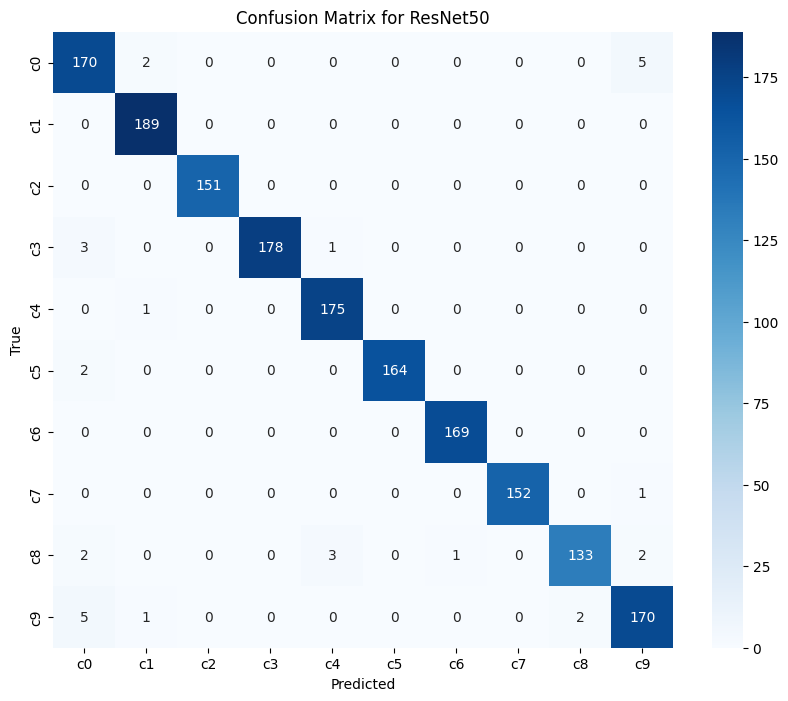

In [ ]:
# Create a heatmap of the confusion matrix
class_names = list(val_generator_resnet50.class_indices.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(true_labels, predicted_labels), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet50')
plt.show()